<a href="https://colab.research.google.com/github/MoonJaeHoon/Various-ML-model-Comparing-Accuracy/blob/master/heart_disease_%EA%B0%81%EC%A2%85%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8%EB%93%A4_%EB%AA%A8%EC%88%98%ED%8A%9C%EB%8B%9D_pyiplot%EC%9D%B4%EC%9A%A9_%EC%A0%95%ED%99%95%EB%8F%84%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings
import seaborn as sns

plt.style.use('seaborn') # matplotlib 도 종류가 다양하기 때문에 seaborn 스타일로 지정한 거임.
sns.set(font_scale=2.5) # (기본으로) 폰트 크기 2.5로 지정 미리 해놓는거 2.5면 꽤 크게 나옴

import missingno as msno # missing data 잘 보여주는 라이브러리

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 


## It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 0: asymptomatic Value 1: atypical angina Value 2: non-anginal pain Value 3: typical angina)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [24]:
import os

os.chdir('./drive/My Drive/heart_disease_모델튜닝의 모든것/heart-disease-uci')
print( '변경 후 파일 경로 :' )
print(  os.getcwd()  )
data = pd.read_csv("./heart.csv")

FileNotFoundError: ignored

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [27]:
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [28]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [0]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

## cp: chest pain type
-- Value 0:
-- Value 1:
-- Value 2:
-- Value 3:

## slope: the slope of the peak exercise ST segment
0; 1; 2

In [0]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [0]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [32]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [33]:
train,test = train_test_split(data, test_size=0.3, random_state=2018)
train.describe() ## summary 해주는거


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.452830,131.721698,249.009434,148.966981,1.087736,0.764151,0.514151
std,8.951297,17.850695,52.159706,23.022014,1.176887,1.026215,0.500983
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,212.000000,132.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.500000,152.000000,0.800000,0.000000,1.000000
75%,60.250000,140.000000,277.250000,165.000000,1.800000,1.000000,1.000000
max,76.000000,192.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [34]:
test.describe() ## summary 해주는거


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,54.164835,131.395604,239.868132,151.230769,0.927473,0.648352,0.615385
std,9.427223,16.881863,50.763769,22.677486,1.121712,1.015148,0.489200
min,34.000000,94.000000,131.000000,90.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,202.000000,137.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,234.000000,155.000000,0.500000,0.000000,1.000000
75%,62.000000,140.000000,271.000000,169.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,409.000000,188.000000,4.400000,4.000000,1.000000


### Diagnosis: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on 1, ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests 2.

In [35]:
print(train.shape)
print(test.shape)

(212, 14)
(91, 14)


In [36]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(train[col].isnull().sum()/train[col].shape[0])) #오른쪽정렬
    print(msg) 

column:        age	 Percent of NaN value: 0.00%
column:        sex	 Percent of NaN value: 0.00%
column: chest_pain_type	 Percent of NaN value: 0.00%
column: resting_blood_pressure	 Percent of NaN value: 0.00%
column: cholesterol	 Percent of NaN value: 0.00%
column: fasting_blood_sugar	 Percent of NaN value: 0.00%
column:   rest_ecg	 Percent of NaN value: 0.00%
column: max_heart_rate_achieved	 Percent of NaN value: 0.00%
column: exercise_induced_angina	 Percent of NaN value: 0.00%
column: st_depression	 Percent of NaN value: 0.00%
column:   st_slope	 Percent of NaN value: 0.00%
column: num_major_vessels	 Percent of NaN value: 0.00%
column: thalassemia	 Percent of NaN value: 0.00%
column:     target	 Percent of NaN value: 0.00%


In [37]:

print( 'train데이터에서 결측치의 비율은', train[col].isnull().sum()/train[col].shape[0], '%')


train데이터에서 결측치의 비율은 0.0 %


### Test 결측치 찾기

In [38]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(test[col].isnull().sum()/test[col].shape[0])) #오른쪽정렬
    print(msg) 

column:        age	 Percent of NaN value: 0.00%
column:        sex	 Percent of NaN value: 0.00%
column: chest_pain_type	 Percent of NaN value: 0.00%
column: resting_blood_pressure	 Percent of NaN value: 0.00%
column: cholesterol	 Percent of NaN value: 0.00%
column: fasting_blood_sugar	 Percent of NaN value: 0.00%
column:   rest_ecg	 Percent of NaN value: 0.00%
column: max_heart_rate_achieved	 Percent of NaN value: 0.00%
column: exercise_induced_angina	 Percent of NaN value: 0.00%
column: st_depression	 Percent of NaN value: 0.00%
column:   st_slope	 Percent of NaN value: 0.00%
column: num_major_vessels	 Percent of NaN value: 0.00%
column: thalassemia	 Percent of NaN value: 0.00%
column:     target	 Percent of NaN value: 0.00%


In [39]:
print( 'test데이터에서 결측치의 비율은', test[col].isnull().sum()/test[col].shape[0], '%')


test데이터에서 결측치의 비율은 0.0 %


### missing map

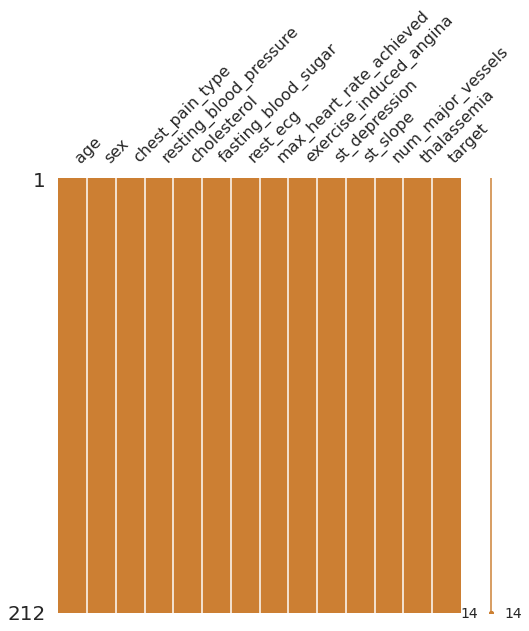

In [40]:
msno.matrix(df=train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2)) ## missing map 이랑 똑같음 # figsize가 전체 크기 # color도 가능


In [41]:
train['target'].value_counts()    ## talbe()이랑 같은 역할 

1    109
0    103
Name: target, dtype: int64

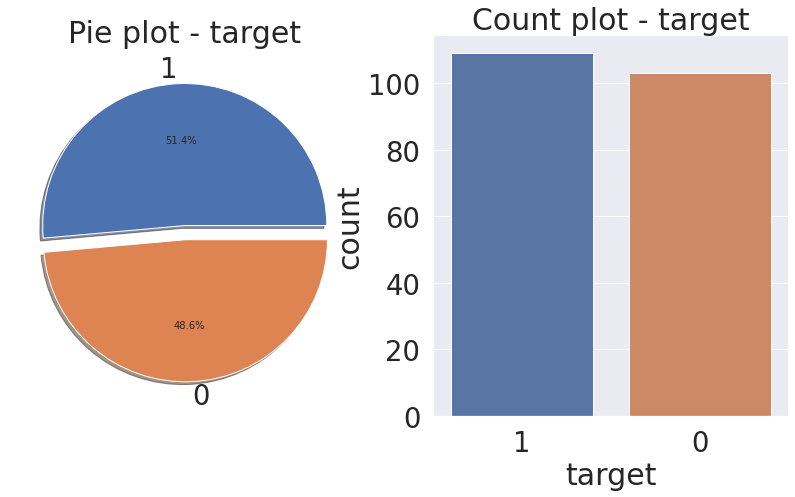

In [42]:
f, ax = plt.subplots(1,2,figsize= (14,7) ) ## 도화지 pallete 랑 같음,      1은 row, 2가 column       mfrow(c(1,2))랑 같음

train['target'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow =True)

# explode는 파이플랏이 서로 찢어지게 # %로 나타내어주기 # a[0]은 첫번째 # 그림자 드리우기

ax[0].set_title('Pie plot - target')
ax[0].set_ylabel('') # ylabel 없애겠다.
sns.countplot('target', data=train, ax = ax[1],order = train['target'].value_counts().index)  # target 콜럼을 count 해달라     # a[1]은 두번째
ax[1].set_title('Count plot - target')
plt.show()

## 범주형 vs 범주형 (target)

sex, chest_pain_type, fasting_blood_sugar, rest_ecg, exercise_induced_angina, st_slope, thalassemia, target

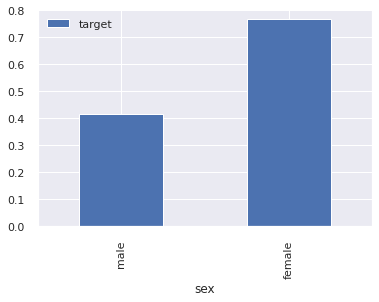

In [43]:
sns.set(style='darkgrid')
train[['sex', 'target']].groupby(['sex'], as_index=True).mean().sort_values(by='sex', ascending = False).plot.bar()

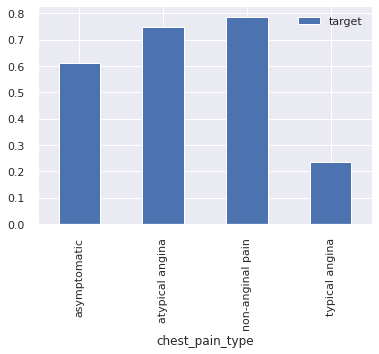

In [44]:
train[['chest_pain_type', 'target']].groupby(['chest_pain_type'], as_index=True).mean().plot.bar()

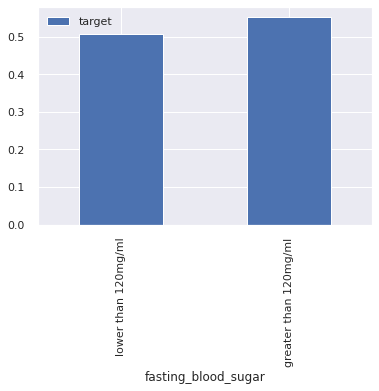

In [45]:
train[['fasting_blood_sugar', 'target']].groupby(['fasting_blood_sugar'], as_index=True).mean().sort_values(by='fasting_blood_sugar', ascending = False).plot.bar()

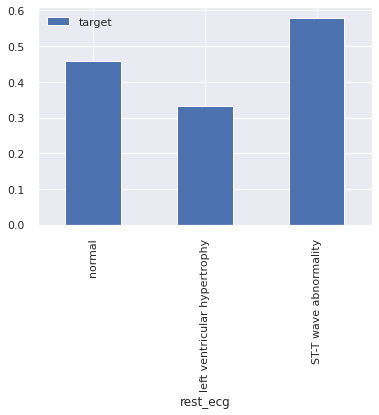

In [46]:
train[['rest_ecg', 'target']].groupby(['rest_ecg'], as_index=True).mean().sort_values(by='rest_ecg', ascending = False).plot.bar()

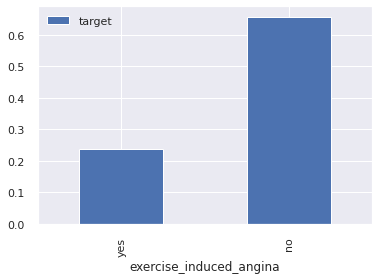

In [47]:
train[['exercise_induced_angina', 'target']].groupby(['exercise_induced_angina'], as_index=True).mean().sort_values(by='exercise_induced_angina', ascending = False).plot.bar()

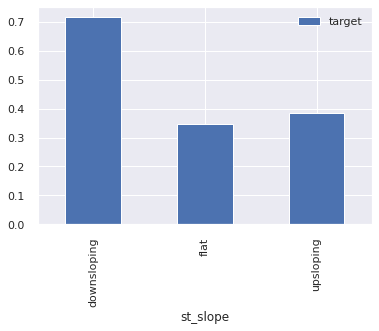

In [48]:

train[['st_slope', 'target']].groupby(['st_slope'], as_index=True).mean().plot.bar()


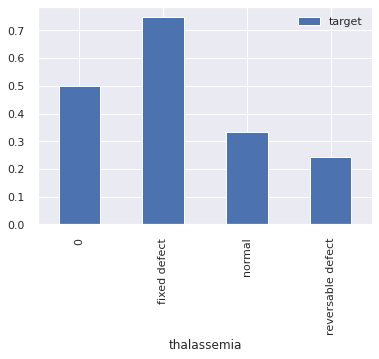

In [49]:
train[['thalassemia', 'target']].groupby(['thalassemia'], as_index=True).mean().plot.bar()

### thalassemia에 0은 결측치인 듯 하다.

### 연속형 분포 보기

fig, ax = plt.subplots(1,1, figsize=(4,4))


g = sns.distplot(train['age'], color='b', label='Skewness : {:.2f}'.format(train['age'].skew()), ax=ax)
g = g.legend(loc='best')


Text(0.5, 1.02, '(3) cholesterol')

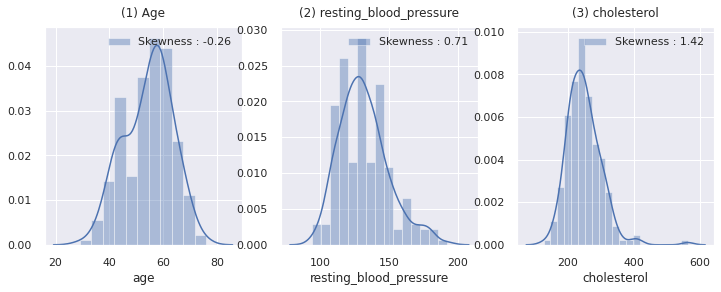

In [50]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

sns.distplot(train['age'], color='b', label='Skewness : {:.2f}'.format(train['age'].skew()), ax=ax[0]).legend(loc='best')
ax[0].set_title('(1) Age', y=1.02)

sns.distplot(train['resting_blood_pressure'], color='b', label='Skewness : {:.2f}'.format(train['resting_blood_pressure'].skew()), ax=ax[1]).legend(loc='best')
ax[1].set_title('(2) resting_blood_pressure', y=1.02)

sns.distplot(train['cholesterol'], color='b', label='Skewness : {:.2f}'.format(train['cholesterol'].skew()), ax=ax[2]).legend(loc='best')
ax[2].set_title('(3) cholesterol', y=1.02)


Text(0.5, 1.02, '(6) num_major_vessels')

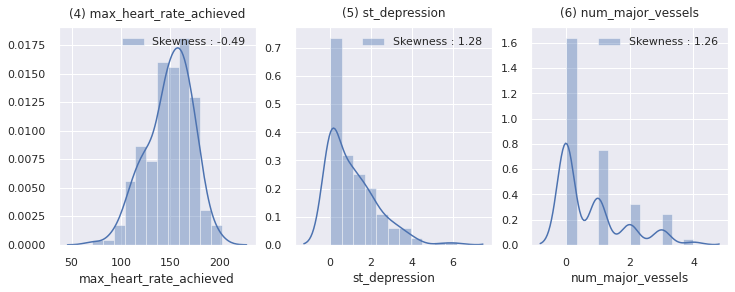

In [51]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

sns.distplot(train['max_heart_rate_achieved'], color='b', label='Skewness : {:.2f}'.format(train['max_heart_rate_achieved'].skew()), ax=ax[0]).legend(loc='best')
ax[0].set_title('(4) max_heart_rate_achieved', y=1.02)

sns.distplot(train['st_depression'], color='b', label='Skewness : {:.2f}'.format(train['st_depression'].skew()), ax=ax[1]).legend(loc='best')
ax[1].set_title('(5) st_depression', y=1.02)

sns.distplot(train['num_major_vessels'], color='b', label='Skewness : {:.2f}'.format(train['num_major_vessels'].skew()), ax=ax[2]).legend(loc='best')
ax[2].set_title('(6) num_major_vessels', y=1.02)


#### 로그변환 해주고 싶지만 비대칭이 존재하는 애들은 다 0인 값이 있음
#### 이대로 분석 진행해야할듯

## 연속형 vs 범주형 (target)

age, resting_blood_pressure, cholesterol, max_heart_rate_achieved, st_depression, num_major_vessels, vs target

#### Age

In [52]:
print('제일 나이 많은  : {:.1f} Years'.format(train['age'].max()))
print('제일 어린  : {:.1f} Years'.format(train['age'].min()))
print('평균 나이 : {:.1f} Years'.format(train['age'].mean()))

제일 나이 많은  : 76.0 Years
제일 어린  : 29.0 Years
평균 나이 : 54.5 Years


### KDE Plot

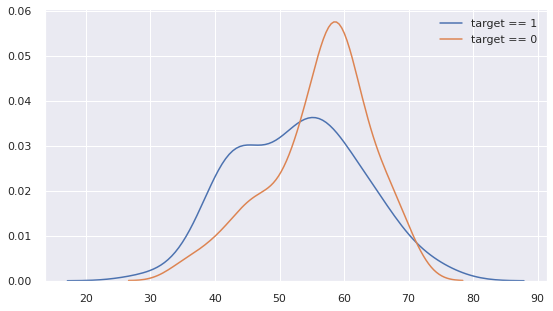

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['target'] == 1]['age'], ax=ax)
sns.kdeplot(train[train['target'] == 0]['age'], ax=ax)
plt.legend(['target == 1', 'target == 0'])
plt.show()

### Boxplot

Text(0.5, 1.02, '(3) cholesterol vs Target')

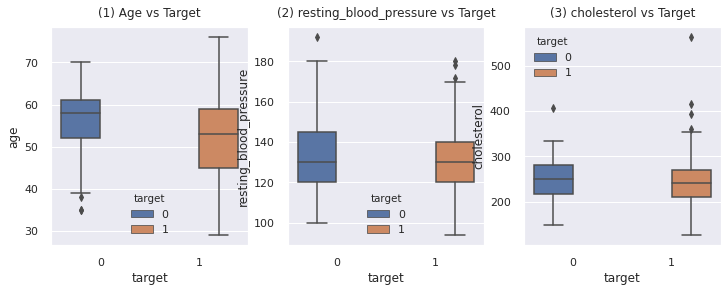

In [54]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

sns.boxplot(x="target",y="age", data=train,hue = 'target', ax=ax[0])
ax[0].set_title('(1) Age vs Target', y=1.02)

sns.boxplot(x="target",y="resting_blood_pressure", data=train,hue = 'target', ax=ax[1])
ax[1].set_title('(2) resting_blood_pressure vs Target', y=1.02)

sns.boxplot(x="target",y="cholesterol", data=train,hue = 'target', ax=ax[2])
ax[2].set_title('(3) cholesterol vs Target', y=1.02)


Text(0.5, 1.02, '(6) num_major_vessels vs Target')

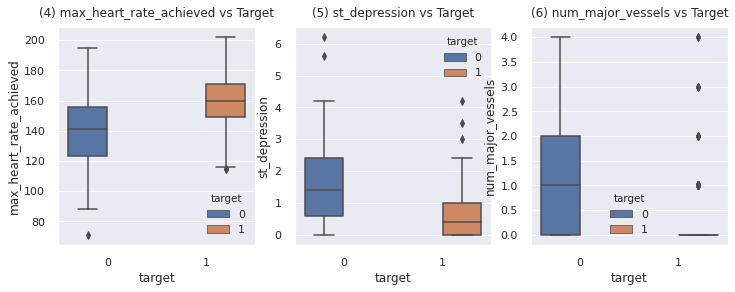

In [55]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

sns.boxplot(x="target",y="max_heart_rate_achieved", data=train,hue = 'target', ax=ax[0])
ax[0].set_title('(4) max_heart_rate_achieved vs Target', y=1.02)

sns.boxplot(x="target",y="st_depression", data=train,hue = 'target', ax=ax[1])
ax[1].set_title('(5) st_depression vs Target', y=1.02)

sns.boxplot(x="target",y="num_major_vessels", data=train,hue = 'target', ax=ax[2])
ax[2].set_title('(6) num_major_vessels vs Target', y=1.02)


#### (6) num_major_vessels 이 변수가 어떤 영향을 미치는지 정확하게 볼 수가 없음

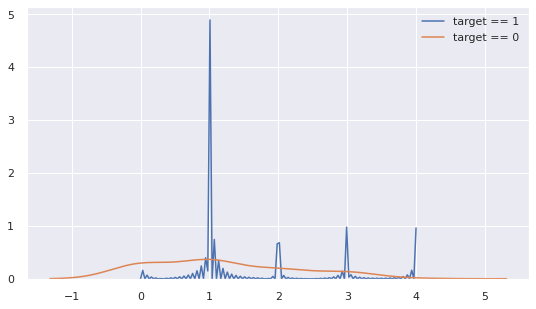

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['target'] == 1]['num_major_vessels'], ax=ax)
sns.kdeplot(train[train['target'] == 0]['num_major_vessels'], ax=ax)
plt.legend(['target == 1', 'target == 0'])
plt.show()

In [57]:
train['num_major_vessels'].describe()

count    212.000000
mean       0.764151
std        1.026215
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: num_major_vessels, dtype: float64

### calculate correlation matrix
### visualize correlations using heatmap


(7.01, -0.01)

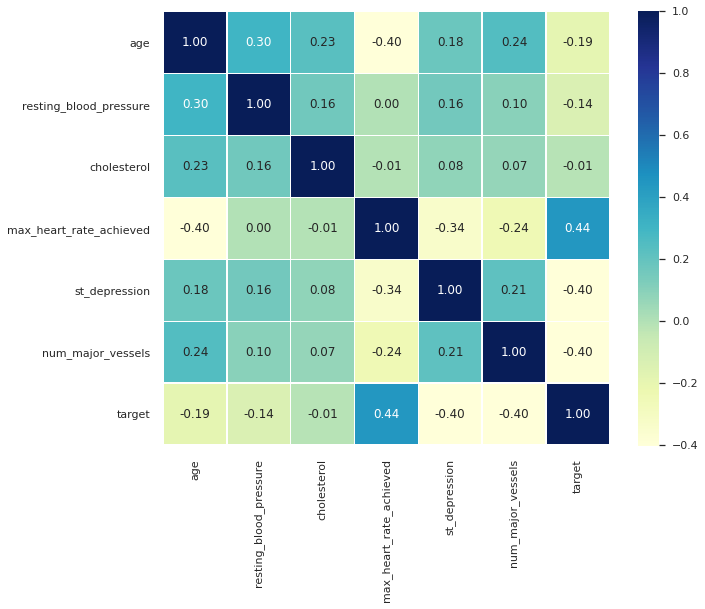

In [58]:
corMat = pd.DataFrame(train.iloc[:,[0,3,4,7,9,11,13]].corr())

plt.figure(figsize=(10,8))

sns.heatmap(data = corMat, annot=True,  # annot 숫자를 표시할지 말지, fmt는 소수점, cmap은 색상
fmt = '.2f', linewidths=.5, cmap='YlGnBu') #cmap ='Blue' , 'RdYlGn_r'가능
plt.ylim(corMat.shape[1] + 0.01, -0.01)

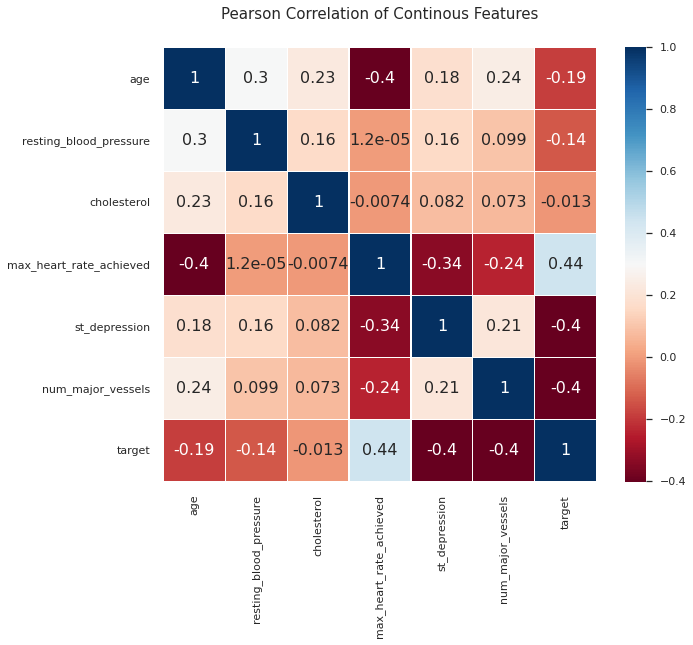

In [59]:
heatmap_data = pd.DataFrame(train.iloc[:,[0,3,4,7,9,11,13]])
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Continous Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
plt.ylim(corMat.shape[1]+0.01, -0.01)

del heatmap_data

## It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* chest_pain_type: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) ## na 존재
* resting_blood_pressure: The person's resting blood pressure (mm Hg on admission to the hospital)
* cholesterol: The person's cholesterol measurement in mg/dl
* fasting_blood_sugar: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* rest_ecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* max_heart_rate_achieved: The person's maximum heart rate achieved
* exercise_induced_angina: Exercise induced angina (1 = yes; 0 = no)
* st_depression: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* st_slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)  ## na 존재
* num_major_vessels: The number of major vessels (0-3)
* thalassemia: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)  ## na 존재
* target: Heart disease (0 = no, 1 = yes)

### 결측치 처리 : chest_pain_type, st_slope, thalassemia 얘네들 0인 값을 가짐.
### 결측치를 빼고 분석을 진행하기는 관측치수가 많지 않기 때문에 안좋다고 생각됨
### Remind!! : 결측치를 채울 때에는 Train에서 채우는 방법 선택하고, test도 그와 같이 채워야 함

In [60]:
train['thalassemia'].value_counts()    ## table()이랑 같은 역할 

fixed defect         111
reversable defect     90
normal                 9
0                      2
Name: thalassemia, dtype: int64

### thalassemia 열에서 결측치 존재하는 인덱스들

In [0]:
na = train[train['thalassemia'] == 0].index
na_set = set(train[train['thalassemia'] == 0].index)


### 결측치 존재하는 애들을 차집합으로 뺀 인덱스들

In [62]:
train['chest_pain_type'].value_counts()    ## talbe()이랑 같은 역할 

typical angina      97
non-anginal pain    61
atypical angina     36
asymptomatic        18
Name: chest_pain_type, dtype: int64

In [0]:
no_na = set(train.index) - na_set
no_na = list(no_na)

In [64]:
len(no_na)

210

### 결측치를 대입하기 위해 필요한 결측치 모두 없는 트레인 셋

In [0]:
train,test = train_test_split(data, test_size=0.3, random_state=2018)


In [0]:
Y = train['thalassemia'].loc[no_na,]
train_drop = train.drop('thalassemia', axis=1)
train_drop_dum = pd.get_dummies(train_drop, drop_first=True)
X = train_drop_dum.loc[no_na,]


### thalassemia 결측치를 구하기 위한 모델링

In [67]:
Y.value_counts()

fixed defect         111
reversable defect     90
normal                 9
Name: thalassemia, dtype: int64

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X, Y, test_size=0.2, random_state=2018)


### 분류모델을 이용한 결측치 대입

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


### Decision Tree을 이용한 결측치 대입

In [0]:
dtree = DecisionTreeClassifier(random_state=2018)
parameters = {
    'max_depth' :[1,2,3],
    'min_samples_split' : [2,3]
}

In [71]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv =10)
grid_dtree.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2018,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

In [72]:
pd.DataFrame(grid_dtree.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.719048,1
1,"{'max_depth': 1, 'min_samples_split': 3}",0.719048,1
2,"{'max_depth': 2, 'min_samples_split': 2}",0.666667,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.666667,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.633333,5
5,"{'max_depth': 3, 'min_samples_split': 3}",0.633333,5


In [73]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 1, 'min_samples_split': 2}
0.719047619047619


In [74]:
dtree = DecisionTreeClassifier(random_state=2018, max_depth =1, min_samples_split=2)
dtree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2018, splitter='best')

In [75]:
fill = train_drop_dum.loc[na]
fill

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping
48,53,128,216,115,0.0,0,1,0,0,1,0,1,0,1,0,0,0
281,52,128,204,156,1.0,0,0,1,0,0,1,0,0,0,1,1,0


In [76]:
train.loc[na,]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
48,53,female,non-anginal pain,128,216,lower than 120mg/ml,normal,115,no,0.0,downsloping,0,0,1
281,52,male,typical angina,128,204,greater than 120mg/ml,ST-T wave abnormality,156,yes,1.0,flat,0,0,0


#### 결측치 채워넣기

In [0]:
train.loc[na,]['thalassemia'] = dtree.predict(fill)

In [78]:
test['thalassemia'].value_counts() ## test에는 없음

fixed defect         55
reversable defect    27
normal                9
Name: thalassemia, dtype: int64

### RF을 이용한 결측치 대입

In [79]:
RF = RandomForestClassifier(random_state=2018)
grid_RF = GridSearchCV(RF, param_grid = parameters, cv = 10)
grid_RF.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [80]:
pd.DataFrame(grid_RF.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,1
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,1
2,"{'max_depth': 2, 'min_samples_split': 2}",0.685714,5
3,"{'max_depth': 2, 'min_samples_split': 3}",0.685714,5
4,"{'max_depth': 3, 'min_samples_split': 2}",0.695238,3


In [81]:
print(grid_RF.best_params_)
print(grid_RF.best_score_)

{'max_depth': 1, 'min_samples_split': 2}
0.7


## Train & Test 마무리 정제작업

In [82]:
train.shape

(212, 14)

In [83]:
test.shape

(91, 14)

In [84]:
y_train = train['target']
X_train = train.drop('target', axis=1)
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.shape

(212, 19)

In [85]:
y_test = test['target']
X_test = test.drop('target', axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test.shape

(91, 18)

### Train 과 Test 를 더미변수화 해줬더니 열 한개가 차이남

In [86]:
set(X_train.columns) - set(X_test.columns)

{'thalassemia_fixed defect'}

In [87]:
X_train.columns == 'thalassemia_fixed defect'


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [0]:
X_test['thalassemia_fixed defect'] = [0 for i in range(X_test.shape[0])]
cols = X_test.columns.tolist()

### Train과 Test 열의 순서가 같아야 함

In [0]:
cols = cols[:16] + cols[-1:] + cols[16:-1]
X_test = X_test[cols]

In [90]:
set(X_train.columns) - set(X_test.columns)

set()

# Modeling

## 1. Ridge Classifier, Logistic Classifier

### 1.1 Ridge

* RidgeClassifier(
                alpha=1.0, # 만약 알파가 0이면 OLS임, 알파가 커질수록 => 베타값들은 0에 가까워짐 = 복잡하지 않은 모형이 됨
                fit_intercept=True, # True 는 절편이 존재
                # normalize=False, # 만약 절편이 존재안한다면, FALSE 해놓으면 이 옵션은 없는거임.
                max_iter=None, # Maximum number of iterations for conjugate gradient solver
                tol=0.001, # 딱봐도 허용오차인듯
                solver='auto', 
                random_state=2018)

In [91]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import *
rid_mod = RidgeClassifier(random_state=2018)

parameters = {'alpha': [0.01, 0.1, 1.0, 10.0], #number of trees, change it to 1000 for better results
              'fit_intercept':[True], # True 는 절편이 존재
              'tol':[0.01, 0.001, 0.0001], # 딱봐도 허용오차인듯
              'solver':['auto']
}


clf_rid= GridSearchCV(rid_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_rid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done  49 out of  60 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=2018, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=6,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True], 'solver': ['auto'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [92]:
pd.DataFrame(clf_rid.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'alpha': 0.01, 'fit_intercept': True, 'solver...",0.900514,7
1,"{'alpha': 0.01, 'fit_intercept': True, 'solver...",0.900514,7
2,"{'alpha': 0.01, 'fit_intercept': True, 'solver...",0.900514,7
3,"{'alpha': 0.1, 'fit_intercept': True, 'solver'...",0.900514,7
4,"{'alpha': 0.1, 'fit_intercept': True, 'solver'...",0.900514,7


In [93]:
print(clf_rid.best_params_)
print(clf_rid.best_score_)

{'alpha': 10.0, 'fit_intercept': True, 'solver': 'auto', 'tol': 0.01}
0.9040445269016697


In [94]:
clf_rid.score(X_test,y_test)

0.9198979591836735

Text(0.2, 0.6, 'AUC: 0.85')

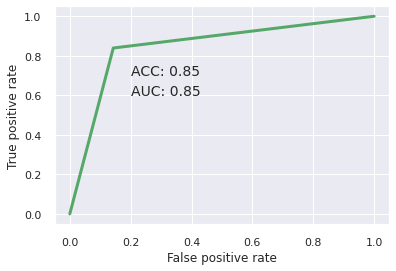

In [95]:
from matplotlib.pyplot import *
%matplotlib inline
pred_rid = clf_rid.predict(X_test)
acc = accuracy_score(y_test, pred_rid )
auc = roc_auc_score(y_test, pred_rid)

fpr, tpr, thr = roc_curve(y_test, pred_rid)
plot(fpr,tpr, color='g', linewidth='3')
xlabel("False positive rate")
ylabel("True positive rate")
annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

In [96]:
rid = clf_rid.best_estimator_
rid.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(rid.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rid.score(X_test, y_test)))

훈련 세트 정확도: 0.854
테스트 세트 정확도: 0.846


### 1.2 Logistic Regression (Elasticnet)

* The Elastic-Net regularization is only supported by the ‘saga’ solver
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
* ‘liblinear’ and ‘saga’ also handle L1 penalty
* ‘saga’ also supports ‘elasticnet’ penalty

* LogisticRegression(
                   penalty='elasticnet', 
                   dual=False, # Prefer dual=False when n_samples > n_features
                   tol=0.0001, 
                   C=1.0, # Like in support vector machines, 작을수록 일반화가 더 빡세게 됨
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   class_weight=None, 
                   random_state=None, 
                   solver='saga', # {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=liblinear)
                                    # 샘플 적을때, ‘liblinear’ is a good choice, 반면 sag’ and ‘saga’는 큰 샘플일때 빠름.
                   max_iter=100, # solver가 수렴하는데 최대 반복횟수, optional (default=100)
                   multi_class='auto', # {‘ovr’, ‘multinomial’, ‘auto’}, default=’ovr' :이진자료
                   verbose=0, 
                   warm_start=False, 
                   n_jobs=-1, # -1 means using all processors
                   l1_ratio= 0.5 # 이게 0이면 l2로만 => Ridge, 이게 1이면 l1으로만 = Lasso
)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
glm = LogisticRegression(random_state=2018)

parameters = {
    'penalty':['elasticnet'],
    'dual':[False],
    'tol': [0.01, 0.001,0.0001],
    'C':[0.1, 1.0, 10], # Like in support vector machines, 작을수록 일반화가 더 빡세게 됨
    'fit_intercept':[True], # True 는 절편이 존재
    'max_iter':[100,500], 
    'solver':['saga'],
    'multi_class':['ovr'], # auto로 넣으면 알아서 함
    'warm_start':[False],
    'n_jobs':[6],
    'l1_ratio':[0.1,0.2,0.3] # 이 자료는 다중공선성도 없고 컬럼 수도 작으니까 얘를 작게 해서 Lasso비율 줄이는게 나을듯
}


clf_glm= GridSearchCV(glm, parameters,
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_glm.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=100, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.0001, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=500, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=500, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=500, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=500, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, l1_ratio=0.1, max_iter=500, multi_class=ovr, n_jobs=6, penalty=elasticnet, solver=saga, tol=0.01, warm_start=

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2018, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10], 'dual': [False],
                         'fit_intercept': [True], 'l1_ratio': [0.1, 0.2, 0.3],
                         'max_iter': [100, 500], 'multi_class': ['ovr'],
                         'n_jobs': [6], 'penalty': ['elasticnet']

In [98]:
pd.DataFrame(clf_glm.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.751737,37
1,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.757639,31
2,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.757639,31
3,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.751737,37
4,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.782126,13


In [99]:
print(clf_glm.best_params_)
print(clf_glm.best_score_)

{'C': 1.0, 'dual': False, 'fit_intercept': True, 'l1_ratio': 0.3, 'max_iter': 500, 'multi_class': 'ovr', 'n_jobs': 6, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.001, 'warm_start': False}
0.785240156668728


Text(0.2, 0.6, 'AUC: 0.73')

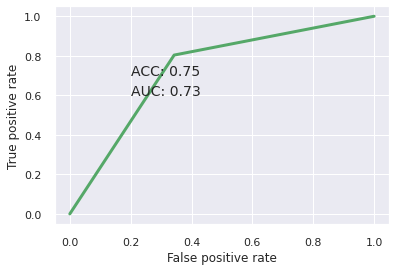

In [100]:
from matplotlib.pyplot import *
%matplotlib inline
pred_glm = clf_glm.predict(X_test)
acc = accuracy_score(y_test, pred_glm )
auc = roc_auc_score(y_test, pred_glm)

fpr, tpr, thr = roc_curve(y_test, pred_glm)
plot(fpr,tpr, color='g', linewidth='3')
xlabel("False positive rate")
ylabel("True positive rate")
annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

### 1.3 Logistic Regression

* penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
* LogisticRegression(
                   penalty='elasticnet', 
                   dual=False, # Prefer dual=False when n_samples > n_features
                   tol=0.0001, 
                   C=1.0, # Like in support vector machines, 작을수록 일반화가 더 빡세게 됨
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   class_weight=None, 
                   random_state=None, 
                   solver='saga', # {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=liblinear)
                                    # 샘플 적을때, ‘liblinear’ is a good choice, 반면 sag’ and ‘saga’는 큰 샘플일때 빠름.
                   max_iter=100, # solver가 수렴하는데 최대 반복횟수, optional (default=100)
                   multi_class='auto', # {‘ovr’, ‘multinomial’, ‘auto’}, default=’ovr' :이진자료
                   verbose=0, 
                   warm_start=False, 
                   n_jobs=-1, # -1 means using all processors
                   l1_ratio= 0.5 # 이게 0이면 l2로만 => Ridge, 이게 1이면 l1으로만 = Lasso
)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
logit = LogisticRegression(random_state=2018)

parameters = {
    'penalty':['l2'],
    'dual':[False],
    'tol': [0.01, 0.001,0.0001],
    'C':[0.1, 1.0, 10], # Like in support vector machines, 작을수록 일반화가 더 빡세게 됨
    'fit_intercept':[True], # True 는 절편이 존재
    'max_iter':[100,500], 
    'solver':['liblinear', 'newton-cg'],
    'multi_class':['ovr'], # auto로 넣으면 알아서 함
    'warm_start':[False],
    'n_jobs':[6],
}


clf_logit= GridSearchCV(logit, parameters,
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_logit.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=liblinear, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_interce

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.01, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.01, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.001, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.001, warm_start=False, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=l2, solver=newton-cg, tol=0.001, warm_start=False 
[CV]  C=0.1, dual=False, fit_intercept=True, max_iter=100, multi_class=ovr, n_jobs=6, penalty=

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2018, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10], 'dual': [False],
                         'fit_intercept': [True], 'max_iter': [100, 500],
                         'multi_class': ['ovr'], 'n_jobs': [6],
                         'penalty': ['l2'],
                         'solver': 

In [102]:
pd.DataFrame(clf_logit.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.908331,11
1,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.906557,21
2,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.906579,19
3,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.903421,31
4,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.902966,33


In [103]:
print(clf_logit.best_params_)
print(clf_logit.best_score_)

{'C': 1.0, 'dual': False, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 6, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001, 'warm_start': False}
0.9095609152752008


In [0]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

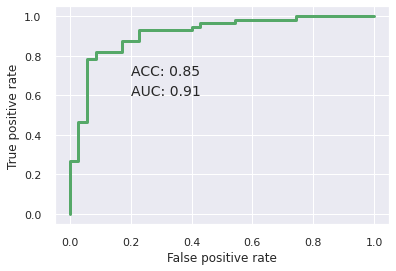

In [105]:
pred_logit = clf_logit.predict_proba(X_test)
performance(y_test,pred_logit)


In [106]:
logit = clf_logit.best_estimator_
logit.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(logit.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(logit.score(X_test, y_test)))

훈련 세트 정확도: 0.858
테스트 세트 정확도: 0.846


## 2. LinearSVC


* LinearSVC(penalty=’l2’, 
            loss=’squared_hinge’, # ‘hinge’ or ‘squared_hinge’ 
                                    # ‘squared_hinge’ is the square of the hinge loss
            dual=True, #  Prefer dual=False when n_samples > n_features.
            tol=0.0001, # default : 0.0001
            C=1.0, 
            multi_class=’ovr’, # ‘ovr’ or ‘crammer_singer’(두개가 다중분류일때 차이가 있음)
                                # "ovr" trains n_classes one-vs-rest classifiers
                                # "crammer_singer" optimizes a joint objective over all classes
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            verbose=0, 
            random_state=None, 
            max_iter=1000)

In [107]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import *
mod_svm = LinearSVC(random_state=2018)

parameters = {
    'loss':['squared_hinge'], # hinge & 'l2'는 dual이 F 일 때 적용불가능
    'penalty':['l2'],
    'dual':[False],
    'tol': [0.01, 0.001,0.0001],
    'C':[0.1, 1.0, 10], # Like in support vector machines, 작을수록 일반화가 더 빡세게 됨
    'fit_intercept':[True], # True 는 절편이 존재
    'max_iter':[100,500,1000], 
    'multi_class':['ovr']
}


clf_svm= GridSearchCV(mod_svm, parameters,
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_svm.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=100, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001 
[CV]  C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=2018, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10], 'dual': [False],
                         'fit_intercept': [True], 'loss': ['squared_hinge'],
                         'max_iter': [100, 500, 1000], 'multi_class': ['ovr'],
                         'penalty': ['l2'], 'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [108]:
pd.DataFrame(clf_svm.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.906988,19
1,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.909692,1
2,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.909692,1
3,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.906988,19
4,"{'C': 0.1, 'dual': False, 'fit_intercept': Tru...",0.909692,1


In [109]:
print(clf_svm.best_params_)
print(clf_svm.best_score_)

{'C': 0.1, 'dual': False, 'fit_intercept': True, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 0.001}
0.9096918161203875


Text(0.2, 0.6, 'AUC: 0.84')

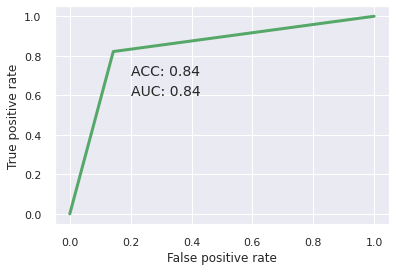

In [110]:
pred_svm = clf_svm.predict(X_test)
acc = accuracy_score(y_test, pred_svm )
auc = roc_auc_score(y_test, pred_svm)

fpr, tpr, thr = roc_curve(y_test, pred_svm)
plot(fpr,tpr, color='g', linewidth='3')
xlabel("False positive rate")
ylabel("True positive rate")
annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

In [111]:
svm = clf_svm.best_estimator_
svm.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 0.858
테스트 세트 정확도: 0.835


## 3. RandomForest

In [112]:
from sklearn.model_selection import *
RF_mod = RandomForestClassifier(random_state=2018)

parameters = {'n_estimators': [50,100,200,300,500], #number of trees, change it to 1000 for better results
              'max_depth': [2,4,6],
              'min_samples_split':[2],
              'max_features':['auto','sqrt'],
              'criterion' :['gini', 'entropy']
}


clf_RF= GridSearchCV(RF_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_RF.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   41.6s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              m...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [113]:
pd.DataFrame(clf_RF.cv_results_)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.897532,19
1,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.897319,21
2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.904848,1
3,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.904764,3
4,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.903054,11


In [114]:
print(clf_RF.best_params_)
print(clf_RF.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
0.9048484848484849


In [0]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

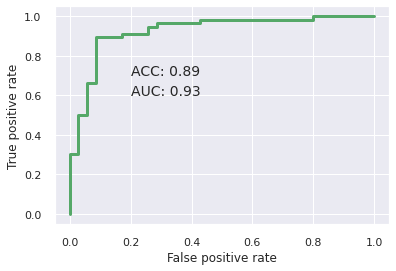

In [116]:
pred_RF = clf_RF.predict_proba(X_test)
performance(y_test,pred_RF)


In [117]:
rf = clf_RF.best_estimator_
rf.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)))

훈련 세트 정확도: 0.858
테스트 세트 정확도: 0.890


## 4. XGBoost

### 튜닝의 순서
1. 높은  learning rate를 선택하고, 이에 맞는 최적의 트리 수를 찾는다.  cv를 사용
2. 트리의 파라미터(max_depth, min_child_weight, gamma, subsample, colsample_bytree)를 결정한다.
3. gamma를 조정해서 정규화에 신경쓴다.
4. colsample, subsample을 조정한다.
4. 정규화 파라미터(lambda, alpha)를 조정해서 모델의 복잡도를 감소시키고 성능을 향상 시키도록 한다.
5. Learning rate를 더 낮추고 최적의 파라미터를 결정한다.

### 4.1 eta = 0.1로 하고, 트리갯수부터 정함

In [118]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              # 'max_features' : ['auto','sqrt'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
              'learning_rate': [0.1], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              # 'max_depth': [2,4,6], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              # 'min_child_weight': [2,3,5], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.8], # 0.5가 좋은 출발점
              'colsample_bytree': [0.8],
              'n_estimators': [30,40,50,60,70,80,100], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018]}


clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:    0.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
             iid='deprecated', n_jobs=6,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'loss': ['deviance'], 'min_samples_split': [2],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 100],
                         'objective': ['binary:logistic'], 'seed': [2018],
                         'silent': [1], 'su

In [119]:
pd.DataFrame(clf_xgb.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.869309,2
1,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.870544,1
2,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.869268,3
3,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.865310,4
4,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.863948,6
5,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.864814,5
6,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.861310,7


In [120]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_split': 2, 'n_estimators': 40, 'objective': 'binary:logistic', 'seed': 2018, 'silent': 1, 'subsample': 0.8, 'warm_start': False}
0.8705442176870749
0.9204081632653061


### 4.2 트리의 파라미터(max_depth, min_child_weight, gmma, subsample, colsample_bytree)를 결정한다.

In [121]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서는
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              'max_features' : ['auto'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
                                        # auto가 보통 Regressor에 사용한다는 소문?이 있음?
              'learning_rate': [0.1], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              'max_depth': [2,4,6,8], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              'min_child_weight': [2,3,4,5,7,8,9,11], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.8], # 0.5, 0.8이 좋은 출발점
              'colsample_bytree': [0.8], # 0.5, 0.8이 좋은 출발점 # 0.5~0.9로 조정
              'n_estimators': [40], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018]}

clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 160 out of 160 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'loss': ['deviance'], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto'],
                         'min_child_weight': [2, 3, 4, 5, 7, 8, 9, 11],
                         'min_samples_split': [2], 'n_estimators': [40],
                         'objectiv

In [122]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': 'auto', 'min_child_weight': 9, 'min_samples_split': 2, 'n_estimators': 40, 'objective': 'binary:logistic', 'seed': 2018, 'silent': 1, 'subsample': 0.8, 'warm_start': False}
0.9047299525870954
0.9198979591836733


### 4.3 gamma를 조정한다.

#### 사실 현재로서는 max_depth가 2밖에 안되니까 gamma를 굳이 크게 할 의미가 없긴 함. 생각해봐야할 부분임

In [123]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              'max_features' : ['auto'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
                                        # auto가 보통 Regressor에 사용한다는 소문?이 있음?
              'learning_rate': [0.1], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              'max_depth': [2], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              'min_child_weight': [7], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.8], # 0.5가 좋은 출발점
              'colsample_bytree': [0.8],
              'n_estimators': [40], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018],
              # 'reg_alpha':[0,0.05,0.1], # L1 regularization term on weights. Increasing this value will make model more conservative.
              # 'reg_lambda':[1] # L2 regularization term on weights. Increasing this value will make model more conservative.
              'gamma':[i*0.05 for i in range(0,50)] # The larger gamma is, the more conservative the algorithm will be.
                            # infromation gain에서 r로 표현한 값. 이 값이 커지면 트리 깊이가 줄어들어 보수적인 모델이 됨 
                            # 웬만하면 0으로 놔둠.
}

clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 239 out of 250 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=6)]: Done 250 out of 250 | elapsed:    3.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
                                   1.4500000000000002, ...],
                         'learning_rate': [0.1], 'loss': ['deviance'],
                         'max_depth': [2], 'max_features': ['auto'],
                         'min_child_weight': [7], 'min_samples_split': [2],
                         'n_estimators': [40], 'objective': ['binary:logistic'],
                      

print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

### 4.4 colsample, subsample 값 조정

In [124]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              'max_features' : ['auto'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
                                        # auto가 보통 Regressor에 사용한다는 소문?이 있음?
              'learning_rate': [0.1], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              'max_depth': [2], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              'min_child_weight': [7], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.1*i for i in range(5,10)], # 0.5가 좋은 출발점
              'colsample_bytree': [0.1*i for i in range(5,10)],
              'n_estimators': [40], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018],
              # 'reg_alpha':[0,0.05,0.1], # L1 regularization term on weights. Increasing this value will make model more conservative.
              # 'reg_lambda':[1] # L2 regularization term on weights. Increasing this value will make model more conservative.
              'gamma':[0] # The larger gamma is, the more conservative the algorithm will be.
                            # infromation gain에서 r로 표현한 값. 이 값이 커지면 트리 깊이가 줄어들어 보수적인 모델이 됨 
                            # 웬만하면 0으로 놔둠.
}

clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=6)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
                         'loss': ['deviance'], 'max_depth': [2],
                         'max_features': ['auto'], 'min_child_weight': [7],
                         'min_samples_split': [2], 'n_estimators': [40],
                         'objective': ['binary:logistic'], 'seed': [2018],
                         'silent': [1],
                         'subsample': [0.5, 0.60000

In [125]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': 'auto', 'min_child_weight': 7, 'min_samples_split': 2, 'n_estimators': 40, 'objective': 'binary:logistic', 'seed': 2018, 'silent': 1, 'subsample': 0.9, 'warm_start': False}
0.9078592042877757
0.9262755102040816


### 4.5 lambda와 alpha 값 조정

In [126]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              'max_features' : ['auto'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
                                        # auto가 보통 Regressor에 사용한다는 소문?이 있음?
              'learning_rate': [0.1], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              'max_depth': [2], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              'min_child_weight': [7], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.8], # 0.5가 좋은 출발점
              'colsample_bytree': [0.9],
              'n_estimators': [40], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018],
              'reg_alpha':[1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100], # L1 regularization term on weights. Increasing this value will make model more conservative.
              'reg_lambda':[0.1*i for i in range(10,21)], # L2 regularization term on weights. Increasing this value will make model more conservative.
              'gamma':[0] # The larger gamma is, the more conservative the algorithm will be.
                            # infromation gain에서 r로 표현한 값. 이 값이 커지면 트리 깊이가 줄어들어 보수적인 모델이 됨 
                            # 웬만하면 0으로 놔둠.
}

clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 374 out of 385 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=6)]: Done 385 out of 385 | elapsed:    5.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
                         'n_estimators': [40], 'objective': ['binary:logistic'],
                         'reg_alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100],
                         'reg_lambda': [1.0, 1.1, 1.2000000000000002, 1.3,
                                        1.4000000000000001, 1.5, 1.6,
                                        1.7000000000000002, 1.8,
            

In [127]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': 'auto', 'min_child_weight': 7, 'min_samples_split': 2, 'n_estimators': 40, 'objective': 'binary:logistic', 'reg_alpha': 1e-05, 'reg_lambda': 1.2000000000000002, 'seed': 2018, 'silent': 1, 'subsample': 0.8, 'warm_start': False}
0.9058462172747888
0.9173469387755102


### 4.6 eta 값을 낮추고, 트리갯수 조정해서 score를 올려보기

In [128]:
from sklearn.model_selection import *
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=2018)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #'nthread':[6], # 높은 입력 = 많은 코어, 입력안하면 기본적으로 최대 코어 사용
              'loss':['deviance'], # deviance가 디폴트 값임, 분류에 관해서
                                # ['ls','lad','huber','quantile'] # ls는 RMSE, lad는 MAD,
                                # huber는 허버라이즈드 손실 : 작은값에 대해서는 제곱오차, 큰값에 대해서는 오차의 절댓값
              'objective':['binary:logistic'],
              'max_features' : ['auto'], # auto는 NFeatures, sqrt는 sqrt(N), log2는 log2(N)
                                                # auto가 보통 Regressor에 사용한다는 소문?이 있음?
              'learning_rate': [0.01, 0.04, 0.07], # eta=0.1 이 default # 작으면 작을수록 트리갯수 많아야함.
              'max_depth': [2], #  feature들이 독립이라면, 깊이가 1인 모델이 깊이가 2인 모델만큼 좋긴 함
                                # feature들이 상호작용도가 존재하면 트리의 깊이가 깊어져야 함.
                                # 깊이 1로 시작하고 다른 모수들 정한 이후에 늘려가면서 성능 개선이 되는지 확인해보자
                                # 깊이 10까지 필요한 경우 거의 없음.0..
                                # 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.
              'min_samples_split':[2], # 2가 default : 2보다 작은 개수의 표본이 노드에 남아있다면 더이상 노드를 나누지 않음.
              'min_child_weight': [7], # chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합을 정의
                                        # GBM에서 min_child_leaf와 유사하나 정확히  같지는 않다.
                                        # 관측치에 대한 가중치의 합의 최소를 말하지만 GBM에서는 관측치들의 수에 대한 최소를 의미한다.
                                        # Over-fitting을 조절하는데 사용된다.  
                                        # 높은 값은 트리에서 선택된 특정 샘플에 대한 높은 관계를 가지는 모델이 되는 것을 방지 한다.
                                        # 너무 높은 값은 under-fitting이 될 수 있기 때문에 CV에 의해 조정되어야 한다.
              'silent': [1],
              'subsample': [0.8], # 0.5, 0.8이 좋은 출발점
              'colsample_bytree': [0.9],
              'n_estimators': [100, 200, 400, 600], #number of trees, change it to 1000 for better results # 10이 default
              'warm_start':[False], # True로 설정하고 fit()을 여러번 하면, fit 할때마다 이전의 중단점에 이어서 시작함.
              'seed':[2018],
              'reg_alpha':[1e-5], # L1 regularization term on weights. Increasing this value will make model more conservative.
              'reg_lambda':[1.1], # L2 regularization term on weights. Increasing this value will make model more conservative.
              'gamma':[0] # The larger gamma is, the more conservative the algorithm will be.
                            # infromation gain에서 r로 표현한 값. 이 값이 커지면 트리 깊이가 줄어들어 보수적인 모델이 됨 
                            # 웬만하면 0으로 놔둠.
}

clf_xgb= GridSearchCV(xgb_model, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_xgb.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:    2.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
                         'loss': ['deviance'], 'max_depth': [2],
                         'max_features': ['auto'], 'min_child_weight': [7],
                         'min_samples_split': [2],
                         'n_estimators': [100, 200, 400, 600],
                         'objective': ['binary:logistic'], 'reg_alpha': [1e-05],
                         'reg_lambda': [1.1]

In [129]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.score(X_test,y_test))

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'max_features': 'auto', 'min_child_weight': 7, 'min_samples_split': 2, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 1e-05, 'reg_lambda': 1.1, 'seed': 2018, 'silent': 1, 'subsample': 0.8, 'warm_start': False}
0.9057369614512473
0.9239795918367347


In [0]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

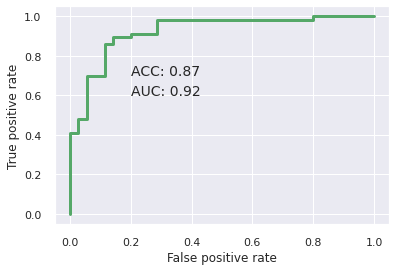

In [131]:
pred_xgb = clf_xgb.predict_proba(X_test)
performance(y_test,pred_xgb)


## 최종 XGB 모델

In [132]:
xgb1 = clf_xgb.best_estimator_
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.01, loss='deviance', max_delta_step=0,
              max_depth=2, max_features='auto', min_child_weight=7,
              min_samples_split=2, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2018,
              reg_alpha=1e-05, reg_lambda=1.1, scale_pos_weight=1, seed=2018,
              silent=1, subsample=0.8, verbosity=1, warm_start=False)

In [133]:
preds_xgb = xgb1.predict(X_test)

# Confusion Matrix 확인
print("[Confusion Matrix]")
print("------------------------------------------------------------------")
#print(pd.crosstab(pd.Series(y_test), pd.Series(preds_xgb) 
#                  ,rownames=['True'], colnames=['Predicted'], margins=True
#                ))

tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred=preds_xgb).ravel()
print(confusion_matrix(y_true = y_test, y_pred=preds_xgb))
print("------------------------------------------------------------------")
print("True_Positive:", tp)
print("True_Negative:", tn)
print("False_Positive:", fp)
print("False_Negative:", fn)
# 리포트 확인
print("------------------------------------------------------------------")
print("[Summary]")
print(metrics.classification_report(y_test, preds_xgb))
print("Accuracy:", metrics.accuracy_score(y_true = y_test, y_pred=preds_xgb))

[Confusion Matrix]
------------------------------------------------------------------
[[30  5]
 [ 7 49]]
------------------------------------------------------------------
True_Positive: 49
True_Negative: 30
False_Positive: 5
False_Negative: 7
------------------------------------------------------------------
[Summary]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.91      0.88      0.89        56

    accuracy                           0.87        91
   macro avg       0.86      0.87      0.86        91
weighted avg       0.87      0.87      0.87        91

Accuracy: 0.8681318681318682


In [134]:
print("훈련 세트 정확도: {:.3f}".format(xgb1.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb1.score(X_test, y_test)))

훈련 세트 정확도: 0.877
테스트 세트 정확도: 0.868


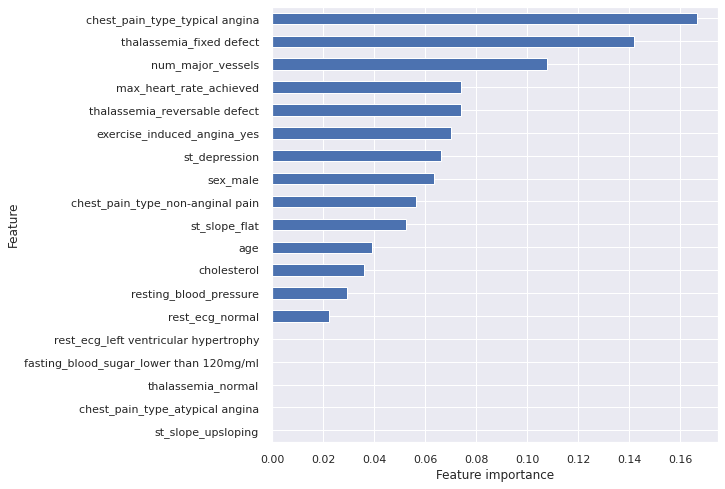

In [135]:
from pandas import Series

feature_importance = xgb1.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* chest_pain_type: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 
* resting_blood_pressure: The person's resting blood pressure (mm Hg on admission to the hospital)
* cholesterol: The person's cholesterol measurement in mg/dl
* fasting_blood_sugar: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* rest_ecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* max_heart_rate_achieved: The person's maximum heart rate achieved
* exercise_induced_angina: Exercise induced angina (1 = yes; 0 = no)
* st_depression: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* st_slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* num_major_vessels: The number of major vessels (0-3)
* thalassemia: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)  ## na 존재
* target: Heart disease (0 = no, 1 = yes)

## 5. 나이브베이즈 ( 다항, 베르누이 )

### 5.1 다항 나이브베이즈

* alpha : Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
* fit_prior : Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
* class_prior : Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [136]:

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import *

MNB_mod = MultinomialNB()

parameters = {'alpha': [0.0001,0.001,0.01,0.1,1.0]}


clf_MNB= GridSearchCV(MNB_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_MNB.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=6,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [0]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

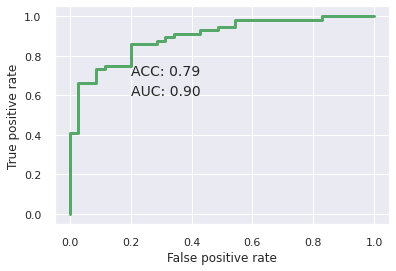

In [138]:
pred_MNB = clf_MNB.predict_proba(X_test)
performance(y_test,pred_MNB)


### 5.2 이항 나이브베이즈

In [139]:

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import *

BNB_mod = BernoulliNB()

parameters = {'alpha': [0.0001,0.001,0.01,0.1,1.0]}


clf_BNB= GridSearchCV(BNB_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_BNB.fit(X_train, y_train)
print(clf_BNB.best_params_)
print(clf_BNB.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'alpha': 1.0}
0.9043011750154608


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  25 out of  25 | elapsed:    0.2s finished


In [0]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

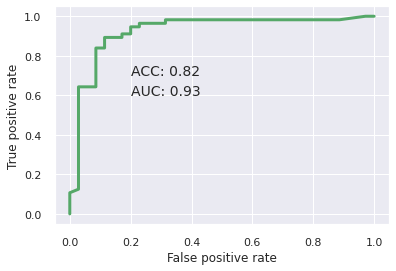

In [141]:
pred_BNB = clf_BNB.predict_proba(X_test)
performance(y_test,pred_BNB)


## 6. 에이다부스트

* base_estimator : None, 
* n_estimators=50, 
* learning_rate : 1.0, 
* algorithm : SAMME.R 가 SAMME보다 일반적으로 더 적은 반복으로 빠르게 수렴함
* random_state=None

In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import *


ADA_mod = AdaBoostClassifier(random_state=2018)

parameters = {'n_estimators': [30,40,50,100,200,300],
              'base_estimator':[None],
              'learning_rate':[0.01,0.1,1.0],
              'algorithm' : ['SAMME.R']
             }


clf_ADA= GridSearchCV(ADA_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_ADA.fit(X_train, y_train)
print(clf_ADA.best_params_)
print(clf_ADA.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:   14.8s finished


{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.01, 'n_estimators': 300}
0.8944331065759638


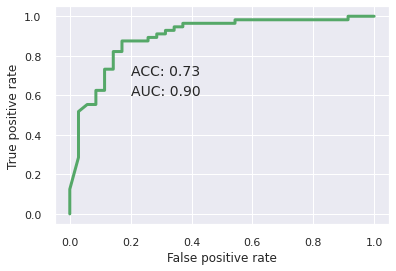

In [143]:
from matplotlib.pyplot import *
%matplotlib inline

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] >0.5 )
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr,tpr, color, linewidth='3')
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
        annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)
        
pred_ADA = clf_ADA.predict_proba(X_test)
performance(y_test,pred_ADA)


## 7. 퍼셉트론

#### 퍼셉트론은 오분류된(mis-classified) 데이터만 이용하는 SGD의 일종이다.
* penalty : None, ‘l2’ or ‘l1’ or ‘elasticnet’
* alpha=0.0001, # Constant that multiplies the regularization term if regularization is used.
* fit_intercept=True, 
* max_iter=1000, 
* tol=0.001, 
* shuffle=True, 
* verbose=0, # 명령처리를 자세히 과정까지 보여주는 모드
* eta0=1.0, # 학습속도 # Constant by which the updates are multiplied
* early_stopping=False, 
* validation_fraction=0.1, # (0~1) 트레인셋에서 valid로 할당할 비율 for early stopping. Only used if early_stopping is True.
* n_iter_no_change=5,  # early stopping 하기 전에 기준횟수 ( 5로 설정하면 정확도 상승안한지 5번 되면 stop해버리는거 )
* class_weight=None,  # Weights associated with classes. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
* warm_start=False)

In [144]:
from sklearn.linear_model import  Perceptron
from sklearn.model_selection import *


PCP_mod = Perceptron(random_state=2018)

parameters = {'max_iter': [5000],
              'fit_intercept':[True],
              'alpha':[0.01, 0.001, 0.0001],
              'tol':[0.01, 0.001,0.0001],
              'eta0':[0.1, 0.5, 1,  2],
              'early_stopping':[True],
              'validation_fraction':[0.1],
              'n_iter_no_change':[50],
              'class_weight':['balanced'], # None
              'warm_start' : [False]
             }


clf_PCP= GridSearchCV(PCP_mod, parameters, n_jobs=6, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=2018), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_PCP.fit(X_train, y_train)
print(clf_PCP.best_params_)
print(clf_PCP.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    1.2s


{'alpha': 0.01, 'class_weight': 'balanced', 'early_stopping': True, 'eta0': 0.1, 'fit_intercept': True, 'max_iter': 5000, 'n_iter_no_change': 50, 'tol': 0.01, 'validation_fraction': 0.1, 'warm_start': False}
0.7599969078540507


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    4.0s finished


Text(0.2, 0.6, 'AUC: 0.68')

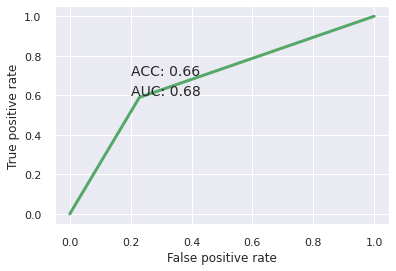

In [145]:
from matplotlib.pyplot import *
%matplotlib inline

pred_PCP = clf_PCP.predict(X_test)
acc = accuracy_score(y_test, pred_PCP )
auc = roc_auc_score(y_test, pred_PCP)

fpr, tpr, thr = roc_curve(y_test, pred_PCP)
plot(fpr,tpr, color='g', linewidth='3')
xlabel("False positive rate")
ylabel("True positive rate")
annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

## 8. 군집화 Nearest Centroid

*    “manhattan” metric => this centroid is the median

In [146]:
from sklearn.neighbors import NearestCentroid
man_NC = NearestCentroid(metric='manhattan')
man_NC.fit(X_train, y_train)

eu_NC = NearestCentroid(metric='euclidean')
eu_NC.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [147]:
print(man_NC.score(X_test,y_test))
print(eu_NC.score(X_test,y_test))
print(eu_NC.classes_)

0.6813186813186813
0.7032967032967034
[0 1]


Text(0.2, 0.6, 'AUC: 0.69')

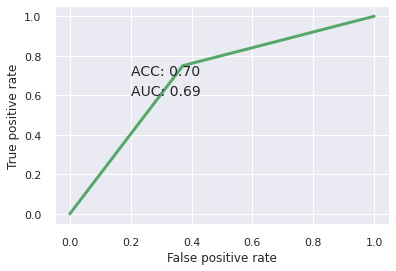

In [148]:
from matplotlib.pyplot import *
%matplotlib inline

pred_NC = eu_NC.predict(X_test)
acc = accuracy_score(y_test, pred_NC )
auc = roc_auc_score(y_test, pred_NC)

fpr, tpr, thr = roc_curve(y_test, pred_NC)
plot(fpr,tpr, color='g', linewidth='3')
xlabel("False positive rate")
ylabel("True positive rate")
annotate("ACC: %0.2f" % acc, (0.2,0.7), size=14)
annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

# 모델들 총정리

* 예쁘게 정확도, ROC 시각화

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import numpy as np
from time import time

def acc_summary(pipeline, x_train, y_train, x_test, y_test):
    
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
  
    #Compute the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #Compute the precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    #Compute the average precision
    average_precision = average_precision_score(y_test, y_pred)
  
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    print ("-"*80)
    return accuracy, precision, recall, average_precision, fpr, tpr

In [0]:
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, Perceptron, LogisticRegression
from sklearn.model_selection import *
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import NearestCentroid
import xgboost as xgb

In [0]:
rid_model = clf_rid.best_estimator_
glmnet_model = clf_glm.best_estimator_
logit_model = clf_logit.best_estimator_
svm_model = clf_svm.best_estimator_
RF_model = clf_RF.best_estimator_
xgb_model = clf_xgb.best_estimator_
MNB_model = clf_MNB.best_estimator_
BNB_model = clf_BNB.best_estimator_
ADA_model = clf_ADA.best_estimator_
PCP_model = clf_PCP.best_estimator_


In [0]:
names = ["Ridge Classifier", "Elastic Net", "Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection",
         "RandomForest", "XGBoost","Multinomial NB","Bernoulli NB","AdaBoost", "Perceptron", "Nearest Centroid"
        ]

classifiers = [
    rid_model,
    glmnet_model,
    logit_model,
    svm_model,
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    RF_model,
    xgb_model,
    MNB_model,
    BNB_model,
    ADA_model,
    PCP_model,
    NearestCentroid(metric='euclidean')
    ]
zipped_clf = zip(names,classifiers)


In [153]:


def classifier_comparator(classifier=zipped_clf):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_acc, prec, rec, avg, fp, tp = acc_summary(checker_pipeline, X_train,y_train, X_test, y_test)
        c.fit(X_train,y_train)
        pred = c.predict(X_test)
        auc = roc_auc_score(y_test, pred)
        result.append((n,clf_acc,prec, rec, avg, fp, tp, auc))
    return result

result = classifier_comparator()


Validation result for Ridge Classifier
RidgeClassifier(alpha=10.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2018,
                solver='auto', tol=0.01)
Average precision-recall score: 0.86
accuracy score: 84.62%
--------------------------------------------------------------------------------
Validation result for Elastic Net
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.3, max_iter=500,
                   multi_class='ovr', n_jobs=6, penalty='elasticnet',
                   random_state=2018, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)
Average precision-recall score: 0.76
accuracy score: 74.73%
--------------------------------------------------------------------------------
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           

In [158]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import numpy as np

acc=[]
names = []
avg_ = []
aucs = []
fp_ = []
tp_ = []

In [159]:

for name, accuracy, prec, rec, avg, fp, tp, auc in result:
    acc.append(accuracy*100)
    names.append(name)
    aucs.append(auc*100)
    avg_.append(avg*100)
    fp_.append(fp)
    tp_.append(tp)
    
    
trace1 = go.Bar(
    x=names,
    y=acc,
    name='Accuracy percentage (%)'
)

trace2 = go.Bar(
    x=names,
    y=aucs,
    name='AUC percentage (%)'
)

trace3 = go.Bar(
    x=names,
    y=avg_,
    name='Average precision (%)'
)


data = [trace1,trace2, trace3]
layout = go.Layout(
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [0]:
data = []
for i in range(0, len(names)):
    trace = go.Scatter(x=fp_[i], y=tp_[i],
                        mode='lines', 
                        name='ROC curve {}'
                               ''.format(names[i]))
    data.append(trace)
    
layout = go.Layout(title='Receiver operating characteristic ',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

fig = go.Figure(data=data, layout=layout)


In [161]:
py.iplot(fig)
